<html>
    <summary></summary>
    <p float="left">
         <div> <p></p> </div>
         <div style="font-size: 20px; width: 800px;">
              <h1>
               <left>Intro to Python: NumPy and Linear Algebra Review </left>
              </h1>
              <p><left>============================================================================</left> </p>              
             <pre>Course: BIOM 421, Spring 2024
Instructor: Dr. Brian Munsky
Contact Info: munsky@colostate.edu
Authors: Will Raymond, Dr. Luis Aguilera, Dr. Brian Munsky
</pre>
         </div>
    </p>

</html>



<details>
  <summary>Copyright info</summary>

```
Copyright 2023 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>

# 1. Basic NumPy

<html>
<summary></summary>
<p float="left">
<img align="left" src="https://numpy.org/images/logo.svg" width="150" height="150">
</p>
</html>

In this notebook we will take a look at one of the most widely used data manipulation packages within Python, Numpy!

numpy and scipy are ubiquitous in the world of scientific computing in Python. **NumPy**, NumericPython, is a library provides access to a lot of generalized array functions for linear algebra or manipulation that is not available with the standard list typing in Python. In addition to providing its powerful ```ndarray``` type, ```numpy``` also includes a myriad of packages for random simulation, basic statistics, sorting, and various matrix transforms.

The core of numpy is the array, ```ndarray```, so let's take a look at that first.

[Numpy Documentation](https://numpy.org/doc/stable/user/whatisnumpy.html)


<img align="right" src = "https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41586-020-2649-2/MediaObjects/41586_2020_2649_Fig1_HTML.png?as=webp" >


------
```Reading: Kinder, Nelson Section 2```

In [2]:
  # Plotting style - here we set some options for pltting later in this notebook.
  import matplotlib.pyplot as plt
  from cycler import cycler
  import matplotlib.cm as cm
  from matplotlib.lines import Line2D
  colors = ['#ef476f', '#06d6a0','#7400b8','#073b4c', '#118ab2',]
  #colors = ['#fa8174', '#b3de69', '#bc82bd','#ccebc4','#ffed6f','#81b1d2']
  font = {'family' : 'monospace',
          'weight' : 'bold',
          'size'   : 12}
  plt.rcParams.update({'font.size': 12, 'font.weight':'bold', 'font.family':'monospace'  }   )
  plt.rcParams.update({'axes.prop_cycle':cycler(color=colors)})
  plt.rcParams.update({'axes.prop_cycle':cycler(color=colors)})
  plt.rcParams.update({'axes.prop_cycle':cycler(color=colors)})
  plt.rcParams.update({'xtick.major.width'   : 2.8 })
  plt.rcParams.update({'xtick.labelsize'   : 12 })
  plt.rcParams.update({'ytick.major.width'   : 2.8 })
  plt.rcParams.update({'ytick.labelsize'   : 12})
  plt.rcParams.update({'axes.titleweight'   : 'bold'})
  plt.rcParams.update({'axes.titlesize'   : 10})
  plt.rcParams.update({'axes.labelweight'   : 'bold'})
  plt.rcParams.update({'axes.labelsize'   : 12})
  plt.rcParams.update({'axes.linewidth':2.8})
  plt.rcParams.update({'axes.labelpad':8})
  plt.rcParams.update({'axes.titlepad':10})

## 1.A.  Making your first array

There are multiple ways of making an array, but one of the easiest is passing ```np.array``` a list or list of lists, or even a list of lists of lists!

We will look at some other ways in a little bit.



In [3]:
import numpy as np

my_list = [0,1,2,3,4]
my_np_array = np.array(my_list)

print(my_np_array)


[0 1 2 3 4]


Now that we have this object, let's compare its methods to the methods of a regular list:


In [ ]:
print('The functions of np_arrays are:')
print(dir(my_np_array))
print('\nThe functions of lists are:')
print(dir(my_list))

Numpy arrays have way more functions associated with them than a regular list! Let's take a look at some of the more commonly used ones:

## 1.B.  Array information methods

Now that we have an array in memory, how do we look at some of its features? How big is it? What is its shape? Thankfully, ```numpy``` has some useful methods to get information such as shape, dimensions, and information type.

Here's some common ones:

given ```arr = np.array([[0,1,2,3,4]])```

| Method    | Description  | Result
| ----------- | ----------- | ------------ |
| arr.shape   |  returns a tuple of the size of each dimensions | ```(1,5) ```   |
| arr.ndim | number of dimensions |```2 ```   |
| arr.dtype   |  the datatype of the info inside the array | ```dtype('int64') ```    
| arr.size | integer total entries of this array | ```5```  |  
| arr.nbytes | the number of bytes in RAM consumed by storing only the information inside the array | ``` 40 ```|


In [ ]:
arr = np.array([[0,1,2,3,4]])

desc = {'shape': '',
    'ndim': 'dimensions',
    'dtype': '',
    'size': 'elements',
    'nbytes':'bytes'}

arr_methods = {'shape': arr.shape,
    'ndim':arr.ndim,
    'dtype':arr.dtype,
    'size':arr.size,
    'nbytes':arr.nbytes}

for x in ["shape", "ndim", "dtype","size","nbytes"]:
    dropdown = x

    print('The %s of the array is %s %s' % (dropdown, str(arr_methods[dropdown]), desc[dropdown] ))


## 1.C.  Array allocation methods

```numpy``` also has some nice methods to preallocate arrays of any size or shape you wish, that you can then fill later with some values.

| Method    | Description  | Examples  | Result
| ----------- | ----------- | ------------ | ------------ |
| np.zeros([n1,n2...]) |  Returns an ndim array of zeros  | ```np.zeros([10,10,10]) ```   | a (10 x 10 x 10) 3d array of zeros
| np.ones([n1,n2...]) | Returns an ndim array of ones  |```np.ones([3,5]) ```   | a (3 x 5) 2d array of ones |
| np.array([n1,n2...]) | converts an iterable to an array | ``np.array([1,2,3])``  |  a 1d array of [1,2,3] |
| np.empty([n1,n2...]) | an empty ndim array | ``` np.empty([3,3]) ```| a (3 x 3) empty array - note values will be from whatever memory it allocated.

Specific cases for easily allocating ranges/identity matrix

| Method    | Description  | Examples  
| ----------- | ----------- | ------------ |
| np.linspace(start, stop, n_steps) | returns a linearly spaced array from start to stop with n_steps | ```np.linspace(0,10,11) ```  |  
| np.logspace(start, stop, n_steps) | returns a linearly spaced array from 10^start to 10^stop with n_step | ``` np.logspace(0,10,11)```|
| np.arange(stop,) | returns a linearly spaced array from a given start or 0 to stop with integer steps (or optional step sizes) | ``` np.logspace(0,10,11)```|
| np.eye(N)   | gives a 2d identify matrix of NxN|  ```np.eye(3) ```   | a (3 x 3) identity matrix (diagonals are 1)

In [ ]:
print('np.zeros:')
print(np.zeros([3,3]))

print('')
print('np.ones:')
print(np.ones([3,3]))

print('')
list_of_lists = [ [y for y in range(3*x,3*x+3)] for x in range(0,3)]
print('np.array() of a list of lists')
print(np.array(list_of_lists ))

print('')
print('np.empty:')
print(np.empty([3,3]))
print('')
print('np.eye(3):')
print(np.eye(3))

In [ ]:
# Using linspace 
start = 1 
stop = 14
n_steps = 49

print('np.linspace(start, stop, n_steps):')
print(np.linspace(start, stop, n_steps))

print('\nnp.logspace(log10(start), log10(stop), n_steps -- in logspace):')
print(np.logspace(np.log10(start), np.log10(stop), n_steps))

print('\nnp.arange(stop):')
print(np.arange(stop))

## 1.D.  Array manipulation methods

### Slicing/ Indexing rules

**array[ row, column, ...., n ]**

Each dimension in a ```numpy``` array can be sliced or indexed just like its a python list:

For example, consider this array:

```
arr = np.array([[1,2,3], \
                [4,5,6], \
                [7,8,9]])
```

| Example    | Description  | Result  
| ----------- | ----------- | ------------ |
| arr[0] | row 0 | ``` [1,2,3] ```  |  
| arr[0,0]| element in row 0, column 0 | ``` [1]```|
| arr[:,0]| column 0 | ``` [1,4,7]```|
| arr[0:2,0:2]| top left block of size 2 x 2 | ``` array([[1,2],[4,5]])```|
| arr[::-1]| reverses the rows | ```[[7,8,9],[4,5,6],[1,2,3]] ```|
| arr[::-1, ::-1]| reverses the rows AND columns | ```[[9,8,7],[6,5,4],[3,2,1]] ```|


### Array logicals

```numpy``` arrays will accept logical indexing or any indexing as long as the shape and maximum indices are correct.

| Example    | Description  | Result  
| ----------- | ----------- | ------------ |
| arr[arr > 5 ]| returns all elements greater than 5| ```array([6, 7, 8, 9]) ```|  
| arr[1][arr[1] > 5 ]| returns all elements in row 1 greater than 5| ```array([6]) ```|  

### Other common manipulation methods:

| Method    | Description  | Examples  
| ----------- | ----------- | ------------ |
| arr.reshape() | will resize an array, the new size must have the same amount of elements!| ```arr.resize(1,9)```  |  
| arr.T | transposes the array | ``` arr.T```|
| np.expand_dims(array, axis) | adds an axis to a given array| ``` np.expand_dims(arr,axis=0)```|
| arr.flatten()   | flattens an array to 1 dimension |  ```arr.flatten()```   |
| np.diag(array,offset)   | gets the diagonal of an array based on offset from middle diag |  ```np.diag(arr,0)```   |
| np.where(statement)   | returns indexes matching the statement |  ```np.where(arr < 5)```   |
| np.at_least2d(arr)   | adds an axis to a 1d array if needed, leaves any ndim >= 2 alone|  ```np.atleast_2d(arr)```   |
| np.tile(iterable, N) | repeat an iterable object N times along an axis | ``` np.tile(arr, N)```|
| np.hstack(iterable of iterables) |Horizontally stack the arrays provided in an iterable (list of arrays) | ```np.hstack([arr1,arr2])``` |
| np.vstack(iterable of iterables) | Vertically stack the arrays provided in an iterable (list of arrays) | ```np.vstack([arr1,arr2])```|
| ___.astype(dtype) | convert a given array to a particular data type | ```np.array([1.2,1.4,1.5]).astype(int)```|
| ___.tolist() | convert a given array to a python list or lists of lists| ```np.array([1.2,1.4,1.5]).tolist()```|

In [ ]:
# Let's try some of those out.
arr = np.array([[1,2,3], \
                [4,5,6], \
                [7,8,9]])

print('\nOriginal:')
print(arr)

print('\nReshaped:')
print(arr.reshape(1,9))

print('\nFlattened:')
print(arr.flatten())

print('\nTranspose:')
print(arr.T)

print('\nadd an extra dimension to the front:')
print(np.expand_dims(arr, axis=0))

print('\nmiddle diagonal:')
print(np.diag(arr, 0))

print('\nindexes of array where the element is less than 5:')
row,col = np.where(arr < 5)
print(f'rows:    {row}')
print(f'columns: {col}')

print('\nconvert the array to the floating point datatype')
print(arr.astype(np.float64))

print('\nconvert the array to a python list')
print(arr.tolist())

## 1.E.  Using Logical Indexing to Manipulate Arrays
When procesing large amounts of data, we often want to perform the same task again and a gain to similar entries in a maxtrix or vector. Logical indexing is a fast and convenient way to accomplish such tasks.

In [ ]:
#Let's start with a large matrix:
A = np.array([ [y for y in range(3*x,3*x+15)] for x in range(0,12)])
print(f'Our Original matrix is:\n {A}')

# We will construct a new matrix B that is saturated at a value 15.  
# That is, all numbers greater than 15 are set at 15.

# Because we do not want to change A itself, we will start by making a copy.
B = np.copy(A)

# Now we can apply our logic:
B[B>15]=15
print(f'\nOur saturated matrix is:\n {B}')

# Let's try another.  This time, we want a matrix 'C' where all values are between 0 and 15, but
# when the numbers exceed those limits, we reflect their values (e.g., 17 which is 2 greater than 15
# becomes 13 which is two less than 15, or -6 which is 6 less than zero becomes 6).  For very large 
# or very small numbers, we may need to run multiple rounds of reflection, so we will use a while loop.
C = np.copy(A)
while (np.max(np.abs(C)))>15:
    C[C>15] = 30 - C[C>15]
    C[C<0] = -C[C<0]
print(f'\nOur reflected matrix is:\n {C}')


## Questions and practice
Answer the following questions to solidify your understanding of this material. 
You should now also be able to answer questions Q6 - Q9 in Homework 2.

In [ ]:
## Generate an array of all zeros of shape 3,3,3,3. Double check that the shape is that using
## the internal shape function. Convert this array to an integer array.

In [ ]:
## Generate a 4x4 Identity matrix and then remove the final row.

In [ ]:
## Repeat the following array vertically 5 times to end up with a 5x3 matrix
arr1 = np.array([[1,2,3]])

In [ ]:
## transpose the following numpy array
arr2 = np.array([[1,2,3],
                 [4,5,6]])

In [ ]:
## Use array logicals to return a flattened array of values greater than 0 in the following array
## Take the sum of all the negative values obtained from the logical operation.
arr3 = np.array([[-1, 2, 3, -31, -0.3 ],
                 [4, 0, 5, 39.3, -37,]])

In [ ]:
## use np.where to find any indexes in the following array that is equal to zero
arr4 = np.array([[-1, 2, 3, -31, 0 ],
                 [4, 0, 5, 39.3,-37,],
                 [5, 4, 0, 0, 1] ])

In [ ]:
## use np.sum with the correct axis=? argument to take the sum of the following array
## along each column

arr5 = np.array([[-1, 2, 3, -31, 13 ],
                 [14, 0, 5, 39.3,-37,],
                 [5, -3, 0, 0, 1] ])

# 2.  Linear Algebra in Numpy

## 2.A.  Matrix math with Numpy

NumPy provides a fast implementation of many linear algebra functions stored in ```np.linalg```.

```numpy``` arrays also can be treated as matrices for arithmetic operations!
Heres some examples of some basic arithmetic operations with two 2x2 matrices:

In [ ]:
A = np.array([[1, 2],
              [3, 4]]) #matrix 1

B = np.array([[5, 6],
              [7, 8]]) #matrix 2
n = 5

examples = {'matrix multiplication': A @ B,
            'element wise multiplication': A * B,
            'matrix division': A @ np.linalg.pinv(B),
            'element wise division': A/B,
            'scalar multiplication': n*A,
            'matrix subtraction': A - B,
            'matrix addition': A + B,
            'scalar addition': n + A,
            }
examples_str = {'matrix multiplication': 'A @ B:',
                'element wise multiplication': 'A * B:',
                'element wise division': 'A / B',
            'matrix division': 'A @ np.linalg.pinv(B):',
            'scalar multiplication': 'n*A',
            'matrix subtraction': 'A - B:',
            'matrix addition': 'A + B:',
            'scalar addition': 'n + A',
            }

print(f'A:\n{A}\n')
print(f'B:\n{B}\n')

for dropdown in ["matrix multiplication","element wise multiplication", "matrix division",
                 "element wise division","scalar multiplication", "matrix subtraction",
                 "matrix addition","scalar addition"]:

    print(examples_str[dropdown])
    print(f'{examples[dropdown]}\n')

Short list of linear algebra functionality in numpy

| Method    | Description  |
| ----------- | ----------- |
| np.cross | cross product of vectors|
| np.dot | dot product of arrays |
| np.linalg.det | determinant of a matrix |
| np.linalg.inner | inner product |
| np.linalg.outer | outer product|
| np.matmul  | matrix product |
| np.trace | trace of a matrix  |
| np.linalg.norm | norm of a vector or matrix, takes arguments for nuclear/frobenius |
| np.linalg.matrix_rank | rank of a matrix |
| np.linalg.cond | condition of a matrix |
| np.linalg.inv  | matrix inverse (multiplicative) |  
| np.linalg.pinv  | matrix psuedo-inverse (Moore-Penrose) |
| np.linalg.svd | Single Value Decomposition |
| np.linalg.null* | Null space |

For more specific commands check out the linalg module in numpy:
https://numpy.org/doc/stable/reference/routines.linalg.html

### Eigen vectors and values

The eigenvector is a characteristic vector of a data set such that any linear transformation applied to the data set only scales the eigenvector linearly. The eigenvectors scale with an associated eigenvalue. Another way of wording that is if I have some set of data, any linear transformation will also linearly transform its eigenvectors, dictated by its eigenvalues.

| Method    | Description  | Examples  
| ----------- | ----------- | ------------ |
| np.linalg.eig | returns the eigen vectors and values of a matrix| |  
| np.linalg.eigvals | returns the eigenvalues of a matrix |

For a very in depth explanation  check out the following youtube video: ["Eigenvectors and eigenvalues | Chapter 14, Essence of linear algebra"](https://www.youtube.com/watch?v=PFDu9oVAE-g)



In [ ]:
# Create a random symmetrix matrix
random_matrix = np.random.randn(5,5)
random_matrix = random_matrix+random_matrix.T

# compute eigenvalue/eigenvector pairs
eigenvals, eigenvecs = np.linalg.eig(random_matrix)

print('Random symmetric matrix:')
print(random_matrix)

print('\nEigen vectors:')
print(eigenvecs)
print('\nEigen values:')
print(eigenvals)

# Note that for symmetric matrices, the eigenvalues and eigenvectors are always real.  

## 2.B.  Matrix Transformations

A linear transformation allows for one to transform a vector in one othonormal basis vector space (i.e., where all basis vectors are orthogonal to one another) to another, potentially more convenient cordinate definition.  

To achieve such a transformation, we can multiple a vector in the original coordinate system by a unitary matrix (a matrix whose collumns are orthogonal to one another).

For example, suppose that we examine a point in 2D denoted by [x,y] in the regular cartesian coordinate system. We can rotate this coordinate systme about the origin [0,0] by an angle $\theta$ (defined as positive in the counter clockwise direction), using the linear transformation:

$\begin{bmatrix}
x'\\
y'
\end{bmatrix} =
\begin{bmatrix}
\cos(\theta) & -\sin(\theta)\\
\sin(\theta) & \cos(\theta) \\
\end{bmatrix} * \begin{bmatrix}
x\\
y
\end{bmatrix}
$

You chould confirm on your own that this transformation matrix is indeed a unitary matrix (i.e., that all columns are orthonormal) by showing that if $\mathbf{v}_i$ and $\mathbf{v}_j$ are both columns of the transformation matrix, then the dot product $\mathbf{v}_i\cdot \mathbf{v}_j$ is one if $i=j$ and zero if $i\ne j$. 

In [ ]:
xy = np.random.randint(0,100,size=(2,100)) # a random constellation of points at integer values
center = np.array([[30],[15]]) # axis of rotation for our image.

print(xy - center)
# perform a rotation:
thetas = [.02, .1, .2]
transformation_mat = lambda theta: np.array([[np.cos(theta), -np.sin(theta)],
                                            [np.sin(theta),  np.cos(theta)]])

# we are going to translate the points to the new center point, then apply the transformation matrix
# application of the rotation:  A^-1 (2x2) @ (xy (100x2)- rotation point (2x1)).T (2 x 100)
new_xy1 = transformation_mat(thetas[0]) @ (xy - center) + center
new_xy2 = transformation_mat(thetas[1]) @ (xy - center) + center
new_xy3 = transformation_mat(thetas[2]) @ (xy - center) + center

plt.plot(center[0], center[1], 'x')
plt.scatter(*xy)
plt.scatter(*new_xy1)
plt.scatter(*new_xy2)
plt.scatter(*new_xy3)
plt.legend(['center', 'original','.02 rad', '.1 rad', '.2 rad'], bbox_to_anchor=(1.05, 1.05))
plt.title('rotating a 100 2D points w/ rotation matrix')

Notice how we had to translate our constellation to a new center then rotate, then translate it back?

With clever application of linear algebra, we can do all of these in one step using an Affine Transformation Matrix which can be constructed as the product of multiple transformation matrixes. Note how above we (1) translated the matrix to its new center, (2) then rotated, and then (3) we translated back to the original origin. We have to keep that order here too when we apply these transformation matrices, so the order is $MT = M3\cdot M2\cdot M1$, where

$
M1 = \begin{bmatrix}
1 & 0 & -\Delta x\\
0 & 1 & -\Delta y\\
0 & 0 & 1
\end{bmatrix}$

$M2 = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0\\
\sin(\theta) & \cos(\theta) & 0\\
0 & 0 & 1
\end{bmatrix}$

$
M3 = \begin{bmatrix}
1 & 0 & \Delta x\\
0 & 1 & \Delta y\\
0 & 0 & 1
\end{bmatrix}$

---
Applying the transformation to a set of points:

$\begin{bmatrix}
x'\\
y'\\
1
\end{bmatrix} =
M3\cdot M2 \cdot M1 \cdot \begin{bmatrix}
x\\
y\\
1
\end{bmatrix}
$

You can try other affine transformation matrices as well -- but for now we are just demonstrating the common linear algebra transformation in ```numpy```.

In [ ]:
# Let's try it:  First, we add in a column of 1s to our x,y constellation so now its 3x100:
print(len(xy[0,:]))
xy_appended = np.vstack([xy, np.ones([1,len(xy[0,:])])])

M1 = lambda rx, ry, theta: np.array([[1, 0, -rx],
                                    [0,  1, -ry],
                                    [0,  0,  1]])
M2 = lambda rx, ry, theta: np.array([[np.cos(theta), -np.sin(theta), 0],
                                     [np.sin(theta), np.cos(theta), 0],
                                     [0,              0,             1]])
M3 = lambda rx, ry, theta: np.array([[1, 0, rx],
                                    [0,  1, ry],
                                    [0,  0,  1]])


MT = lambda rx, ry, theta: M3(rx,ry,theta)@M2(rx,ry,theta)@M1(rx,ry,theta)
#Set the center point about which to rotate: 
rx = center[0,0]
ry = center[1,0]

#Set the angle to rotate counter-clockwise (radians)
theta = 0.2

xy_translated = MT(rx,ry,theta) @ xy_appended

plt.plot(rx, ry, 'x')
plt.scatter(*xy_appended[:2]) # only plot along the first two dimensions
plt.scatter(*xy_translated[:2])
plt.scatter(new_xy3[0,:],new_xy3[1,:],marker='.')

plt.legend(['center', 'original',f'{theta} rad (new approach)',f'{theta} rad (old approach)'], bbox_to_anchor=(1.05, 1.05))
plt.title('rotating a 100 2D points w/ affine rotation matrix')

# 3. SVD and PCA

Principal component analysis (PCA) is a specific linear transformation that chooses a set of ordered basis vectors (i.e., a new coordinate system) where each orthoganal axis is a "Principal Component," usually arranged in an order such that each new vector captures the next greatest percentage of variation in the given dataset.  In other words, the first principal component is the direction that has the most variation, the second has the next most, etc.

Singular value decomposition is an efficient linear algebra method that generalizes the eigenvalue-eigenvector decomposition to allow a similar decompositon to be performed on rectangular matrices. SVD decomposes a $m\times n$ matrix $\mathbf{X}$ as 

$\mathbf{X} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^*,$

where $U$ is an orthonormal matrix with m rows and $p=\min(m,n)$ columns; $\Sigma$ is a $p\times p$ diagonal matrix with non-negative real values called the singular values and are usually ordered from largest to smallest; and V is a second orthonormal matrix with $n$ rows and $p=\min(m,n)$ columns ($\mathbf{V}^*$ is the conjugate transpose of $\mathbf{V}$).

We can use SVD to obtain the largest orthonormal eigenbasis for any m x n matrix, which is precisely the operation needed to perform PCA! We will show two implementations below, but first we need some data!

A 2D multivariate gaussian is one of the best ways to visualize this particular transformation (without dimensionality reduction)! So let's generate one:

(-10.0, 10.0)

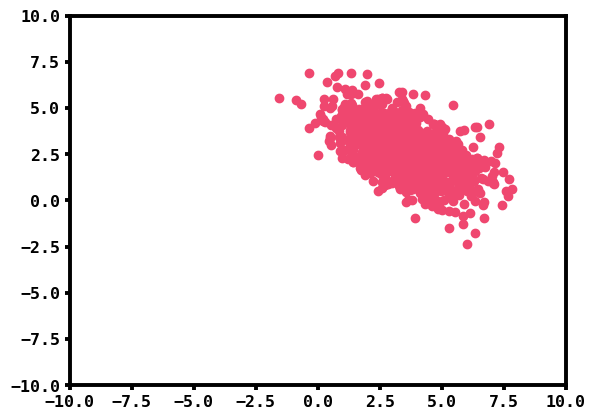

In [4]:
# Specify some parameters to define our distribution:
mu = np.array([3.6,2.7])
sig = np.array([[2,-1],[-1,2]])

# Generate random data from multivariate gaussian:
random_gaussian = np.random.multivariate_normal(mu,sig, size=(1000))

# Plot the data:
plt.scatter(random_gaussian[:,0], random_gaussian[:,1])
plt.xlim([-10,10])
plt.ylim([-10,10])

In [5]:
# Let's get some help on how to use SVD.
np.linalg.svd?

Signature:       np.linalg.svd(a, full_matrices=True, compute_uv=True, hermitian=False)
Call signature:  np.linalg.svd(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function svd at 0x0000015309FAEAC0>
File:            c:\users\carle\anaconda3\envs\biom421\lib\site-packages\numpy\linalg\linalg.py
Docstring:      
Singular Value Decomposition.

When `a` is a 2D array, and ``full_matrices=False``, then it is
factorized as ``u @ np.diag(s) @ vh = (u * s) @ vh``, where
`u` and the Hermitian transpose of `vh` are 2D arrays with
orthonormal columns and `s` is a 1D array of `a`'s singular
values. When `a` is higher-dimensional, SVD is applied in
stacked mode as explained below.

Parameters
----------
a : (..., M, N) array_like
    A real or complex array with ``a.ndim >= 2``.
full_matrices : bool, optional
    If True (default), `u` and `vh` have the shapes ``(..., M, M)`` and
    ``(..., N, N)``, respectively.  Otherwise, the shapes are
    ``(..., M, K)`` and `

In [6]:
# PCA using  SVD

# PCA requires CENTERRED data (zero mean), so let's subtract the mean:
centered_gaussian = random_gaussian - random_gaussian.mean(axis=0)

# Now to compute the SVD transformation of the zero-mean data:
U, S, V = np.linalg.svd(centered_gaussian,full_matrices=False) #single valuar decomp with numpy

# This results in:
# U = unitary matrix (possibly complex) for the range (columns space) of the matrix. 
# S = singular values (non-negative real values)
# V = unitary matrix (possibly complex) for the 

print(U.shape)
print(S.shape)
print(V.shape)

(1000, 2)
(2,)
(2, 2)


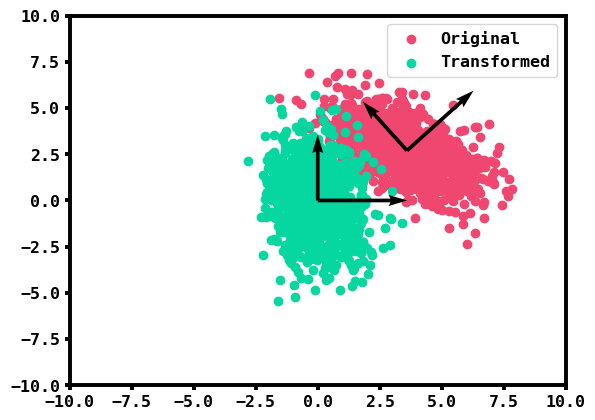

In [7]:
X_new = centered_gaussian @ V # transform our original data after being centered

plt.scatter(random_gaussian[:,0], random_gaussian[:,1])
plt.scatter(X_new[:,0], X_new[:,1])
plt.xlim([-10,10])
plt.ylim([-10,10])

#plot the eigen vectors by their eigen values!
plt.quiver(*mu, *V[:,0], color=['k'], scale=np.sqrt(S[1]))
plt.quiver(*mu, *V[:,1], color=['k'], scale=np.sqrt(S[0]))
plt.quiver(*np.mean(X_new,axis=0), *(np.eye(2))[:,0], color=['k'], scale=np.sqrt(S[1]))
plt.quiver(*np.mean(X_new,axis=0), *(np.eye(2))[:,1], color=['k'], scale=np.sqrt(S[0]))

plt.legend(['Original','Transformed'])

Note how the original gaussian has been placed on its 2 new axes perfectly by rotating the original data. Now what happens if we apply PCA and start removing axis / dimensions? Well for one, our reconstruction will be imperfect. You can calculate the exact amount of variance captured by including each axis, which we will do next.

In [15]:
# Let's start by creating a data set that contains a mixture of two different types of 
# multivariate random variables:

# We start by creating a random mean and covariance matrix for the two types of random variables.
nVariables = 20

# Let's generate a pair of random means for two types of data
mn1 = np.random.rand(nVariables)
mn2 = np.random.rand(nVariables)

# Let's also generate a pair of random covariance matrices.
sig1 = np.cov(np.random.rand(nVariables,6))
sig2 = np.cov(np.random.rand(nVariables,6))

# Next, we generate many samples from each distribution:
nSamples = 1000
samples1 = np.random.multivariate_normal(mn1,sig1,size=nSamples)
samples2 = np.random.multivariate_normal(mn2,sig2,size=nSamples)

# Now to combine the two data sets into a single normalized data set:
X = np.vstack([samples1,samples2])
std = np.sqrt(np.var(X,axis=0))
X = (X-np.mean(X,axis=0))/std
print(f'X = {X}')

X = [[-0.66093396 -0.09244284  1.7520898  ... -1.90157455  0.10576879
   0.95170812]
 [ 1.06091074  0.66164744  0.43539424 ...  0.60284191  1.03516026
   0.27633523]
 [ 0.0781848   0.47036898  0.89063425 ... -0.30818387  0.77523619
   0.80364682]
 ...
 [ 0.08166615 -0.31979142  0.33498251 ... -0.0104594   0.41439521
  -0.33757875]
 [ 2.07819328  0.11220377 -2.43084547 ... -0.19959459 -1.54435135
  -2.95349843]
 [ 0.0413163  -0.53051065  0.11643327 ...  0.17248434 -0.06187922
  -0.00551755]]


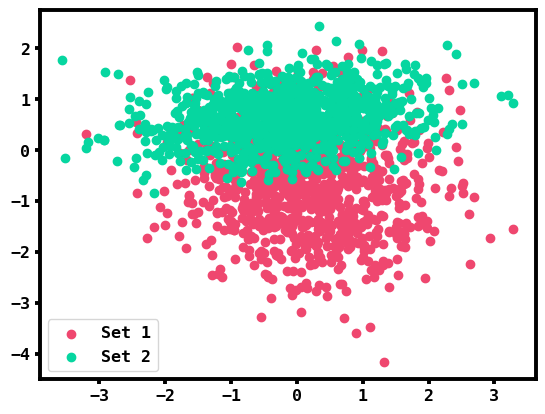

In [19]:
# Now, let's plot these two sample sets on a couple of their axes:
ax0 = 0
ax1 = 5
plt.scatter(X[:1000,ax0], X[:1000,ax1])
plt.scatter(X[1000:,ax0], X[1000:,ax1])
plt.legend(['Set 1','Set 2'])

# Note that the two data types are similar but not exactly the same.
# Try different combinations to see if you can separate out the two colors.

Now we can "Select" components by discarding axis along our matrices. Using only the first two components (first 2 indexes) of each matrix will let us construct some $\hat{X}$ that is a lossy representation of our original data, $X$. Play with the number of components included, and see how the error of $\hat{X}$ vs $X$ changes in relation to number of components used!

We can also calculate the explained variance by squaring the sum of the singular values kept divided by the total singular values squared!

$ Explained\: Variance = S[:N_{components}]^2 / S^2$

In [20]:
# Compute the SVD transformation of the zero-mean data:
U, S, V = np.linalg.svd(X) #single value decomp with numpy

components = [0,1,2]
X_hat = U[:,components] @ (np.diag(S[components]) @ V[components,:]) # apply the transformation to the data
explained_variance = np.sum(S[components]**2/np.sum(S**2))
X_reduced = (X @ V[components,:].T)

print('MSE transformed data to original data:')
print(np.sum(np.subtract(X_hat, X)**2))
print('')
print(f'Total explained variance of components: {components}')
print('{} %'.format(explained_variance*100))
print('')
print('reduced dimension:')
print(X_reduced.shape)


MSE transformed data to original data:
16038.970320651371

Total explained variance of components: [0, 1, 2]
59.902574198371596 %

reduced dimension:
(2000, 3)


So by keeping just a few principal components, we are able to reconstruct most of the variations in our data! Another way of saying this is that we can effectively reduce the dimension of our data set and keep track of how much information we lose.  

But how does that affect the differences between the two different populations?

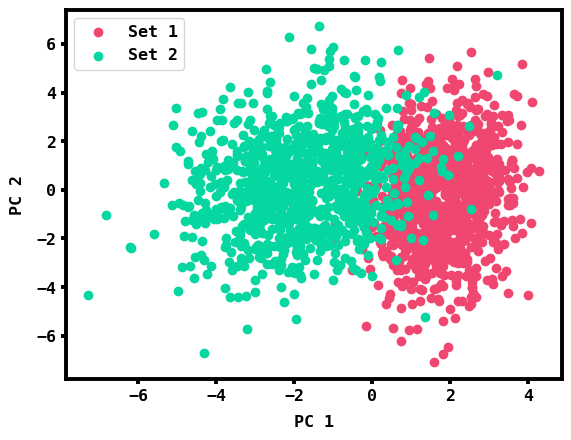

In [21]:
# Plotting our reduced representation based on the first 2 components
components = [0,1]  # Pick which components to include.
X_reduced = X @ V[components,:].T # Project data onto the

plt.scatter( *X_reduced[:1000,:].T, )
plt.scatter( *X_reduced[1000:,:].T, )
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.legend(['Set 1','Set 2'])

Notice any trends? Using the first few PCA vectors, it is much easier to distinguish between the two data types. Later in the course we will explore this for classification of different types of data.

## Questions and practice
You should now be able to complete problems 12 and 13 in Homework 2, and also try the following on your own.

In [ ]:
## Apply a scaling affine transformation matrix to a constellation of points.  This transformation should
## scale (i.e. strectch or compress) the points in the x and y directions relative to some spatially fixed 
## origin point. 
## Hint: [ Scaling x   0       -rx ]
##       [ 0       Scaling y   -ry ]
##       [ 0           0         1 ]

In [ ]:
## Apply SVD to an image, then reconstruct the image with varying amounts of singular values
## What do you notice about using more singular values for reconstruction vs less?
## How does the "quality" of the reconstructed image relate to the explained variance?
## Hint: You may have to apply SVD to each channel if you are using a H x W x Color image.